# Discover
https://www.kaggle.com/datasets/mexwell/google-merchandise-sales-data/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
events_df = pd.read_csv('data/events1.csv')
events_df.head()

,user_id,ga_session_id,country,device,type,item_id,date
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29


In [3]:
from ydata_profiling import ProfileReport

profile = ProfileReport(events_df, title='Pandas Profiling Report', explorative=True)

In [4]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [173]:
events_df.isnull().sum()

user_id             0
ga_session_id       0
country          4555
device              0
type                0
item_id             0
date                0
dtype: int64

In [174]:
len(events_df)

758884

In [175]:
items_df = pd.read_csv('data/items.csv')
items_df.head()

,id,name,brand,variant,category,price_in_usd
0,0,Google Land & Sea Cotton Cap,Google,Single Option Only,Apparel,14
1,1,Google KeepCup,Google,Single Option Only,New,28
2,2,Google Land & Sea Nalgene Water Bottle,Google,Single Option Only,Drinkware,20
3,3,Google Unisex Eco Tee Black,Google,LG,Uncategorized Items,22
4,4,Google Chicago Campus Bottle,Google,Single Option Only,Campus Collection,11


In [176]:
items_df.isnull().sum()

id                0
name              0
brand             0
variant         408
category          0
price_in_usd      0
dtype: int64

In [177]:
len(items_df)

1381

# Wrangle

In the Wrangle part, you will have to

Join the two or more datasets you selected into one big data table, and
Solve issues like formatting issues, missing data, faulty values, and non-matching keys
Take notes about the steps necessary in this stage to make the data usable; you will need this for the final report.

--------

Grading:

6 points for completing the Wrangle task.
10 points extra, if you can (visually!) show and explain the data quality of your dataset (for example, before and after cleaning steps). There are no instructions how such a visualization should look like, since this also highly depends on the chosen domain and data. You will have to come up with your own, creative, solution here.

In [178]:
# Merge the two dataframes
df = pd.merge(events_df, items_df, left_on='item_id', right_on='id')
df.head()

,user_id,ga_session_id,country,device,type,item_id,date,id,name,brand,variant,category,price_in_usd
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14,94,Google Large Tote White,Google,Single Option Only,Bags,10
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14,425,Google Heather Green Speckled Tee,Google,XL,Apparel,21
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44,1,Google KeepCup,Google,Single Option Only,New,28
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44,62,Google Mini Kick Ball,Google,Single Option Only,Fun,2
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29,842,Google Infant Hero Onesie Grey,Google,NaN,Apparel,25


In [179]:
df.isnull().sum()

user_id               0
ga_session_id         0
country            4555
device                0
type                  0
item_id               0
date                  0
id                    0
name                  0
brand                 0
variant          636260
category              0
price_in_usd          0
dtype: int64

In [180]:
df['variant'].unique()

array(['Single Option Only', ' XL', nan, ' 2XL', ' LG', ' MD', ' SM',
       ' XS', ' 18/24 MONTHS', ' 4T', ' 5/6T', ' 3XL', ' 3T',
       ' 12/18 MONTHS', ' GREEN', ' BLUE', ' RED', ' 2T', ' 6/12 MONTHS',
       ' 3/6 MONTHS', ' 6M', ' NEWBORN', 'SM', 'MD', 'XL', '6/12 MONTHS',
       'LG', 'Choose Size', 'XS', '3/6 MONTHS', '3XL', '12/18 MONTHS',
       '3T', '4T', '2XL', 'NEWBORN', '5/6T', ' 18M', ' 5T', ' XXS', '2T',
       'BLUE', ' 12M', ' 24M', 'No options available'], dtype=object)

In [181]:
df.drop(columns=['variant'], inplace=True)
df.drop(columns=['id'], inplace=True)
df.head()

,user_id,ga_session_id,country,device,type,item_id,date,name,brand,category,price_in_usd
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14,Google Large Tote White,Google,Bags,10
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14,Google Heather Green Speckled Tee,Google,Apparel,21
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44,Google KeepCup,Google,New,28
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44,Google Mini Kick Ball,Google,Fun,2
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29,Google Infant Hero Onesie Grey,Google,Apparel,25


In [182]:
df['country'].unique()

array(['US', 'SE', 'CA', 'BE', 'GB', 'TR', 'PE', 'ES', 'IN', 'MY', 'IT',
       'BD', 'BR', 'LB', 'CN', 'PT', 'VN', 'JP', nan, 'EC', 'RU', 'DE',
       'HK', 'AU', 'MA', 'FR', 'GR', 'SA', 'AT', 'CO', 'SG', 'IE', 'PK',
       'IL', 'GT', 'NG', 'KR', 'MT', 'CZ', 'NL', 'AR', 'CH', 'TW', 'MX',
       'HU', 'PL', 'BH', 'FI', 'ID', 'SI', 'EG', 'UA', 'LV', 'PH', 'AE',
       'DK', 'GE', 'TH', 'PR', 'CL', 'MK', 'KE', 'SK', 'NZ', 'IQ', 'ZA',
       'DO', 'UY', 'VE', 'AL', 'CR', 'LK', 'TN', 'RS', 'SV', 'IS', 'RO',
       'DZ', 'MO', 'BG', 'HR', 'KW', 'NO', 'KZ', 'KH', 'EE', 'PS', 'AZ',
       'MN', 'JO', 'BO', 'QA', 'JM', 'CY', 'LT', 'BS', 'LU', 'NP', 'HN',
       'GH', 'OM', 'BY', 'BA', 'PY', 'PA', 'XK', 'TT', 'MM', 'AM'],
      dtype=object)

In [183]:
df.fillna({'country': 'UNK'}, inplace=True)

In [184]:
df.isnull().sum()

user_id          0
ga_session_id    0
country          0
device           0
type             0
item_id          0
date             0
name             0
brand            0
category         0
price_in_usd     0
dtype: int64

In [185]:
len(df)

758884

In [186]:
df.dtypes

user_id           int64
ga_session_id     int64
country          object
device           object
type             object
item_id           int64
date             object
name             object
brand            object
category         object
price_in_usd      int64
dtype: object

In [187]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

user_id                   int64
ga_session_id             int64
country                  object
device                   object
type                     object
item_id                   int64
date             datetime64[ns]
name                     object
brand                    object
category                 object
price_in_usd              int64
dtype: object

In [188]:
df['date_day'] = df['date'].dt.date
events_over_time = df['date_day'].value_counts().sort_index()

In [189]:
events_over_time_by_type = df.groupby(['date_day', 'type']).size().unstack().fillna(0)

In [190]:
# Filter the dataframe for rows where add_to_cart is 0
zero_add_to_cart_days = events_over_time_by_type[events_over_time_by_type['add_to_cart'] == 0]

# Find the last day with 0 add_to_cart events
last_zero_add_to_cart_day = zero_add_to_cart_days.index.max()
last_zero_add_to_cart_day

datetime.date(2020, 11, 24)

In [191]:
# trim df to only include data from last_zero_add_to_cart_day + 1
df = df[df['date_day'] >= last_zero_add_to_cart_day + pd.Timedelta(days=1)]

In [192]:
df

,user_id,ga_session_id,country,device,type,item_id,date,name,brand,category,price_in_usd,date_day
19606,263790,17763,US,mobile,begin_checkout,77,2020-11-25 00:03:03,YouTube Twill Sandwich Cap Black,YouTube,Apparel,10,2020-11-25
19607,29469,17328,US,desktop,begin_checkout,135,2020-11-25 00:03:46,Google NYC Campus Bottle,Google,Campus Collection,11,2020-11-25
19608,29469,17328,US,desktop,begin_checkout,135,2020-11-25 00:05:07,Google NYC Campus Bottle,Google,Campus Collection,11,2020-11-25
19609,22221,9730,CA,mobile,begin_checkout,0,2020-11-25 00:05:09,Google Land & Sea Cotton Cap,Google,Apparel,14,2020-11-25
19610,22221,9730,CA,mobile,begin_checkout,78,2020-11-25 00:05:09,Google PNW Campus Mug,Google,Campus Collection,7,2020-11-25
...,...,...,...,...,...,...,...,...,...,...,...,...
758879,234237,12443,IN,desktop,add_to_cart,1130,2021-01-31 23:59:08,Google Pocket Tee Grey,Google,Apparel,29,2021-01-31
758880,234237,12443,IN,desktop,add_to_cart,973,2021-01-31 23:59:08,Android Super Hero 3D Framed Art,Android,Accessories,40,2021-01-31
758881,234237,12443,IN,desktop,add_to_cart,915,2021-01-31 23:59:08,Android Large Removable Sticker Sheet,Android,Accessories,3,2021-01-31
758882,234237,12443,IN,desktop,add_to_cart,919,2021-01-31 23:59:08,Android SM S/F18 Sticker Sheet,Android,Accessories,3,2021-01-31


# Profile

In the Profile stage you need to

Find at least 3 valuable insights.
Show the insights by using visualization.

The insights will have to be reported in the final report (incl. visualizations).

In the Profile part, you will have to explore the data in detail, to completely understand its structure, and to discover any interesting patterns that can be found in there. The following steps are required:

Find at least 3 informative insights in your dataset, and
Show and explain the insights using visualizations (one visualization per insight).
The insights together with the visualizations will have to be included in the report.

--------

Grading:

8 points for the description and visual representation of every insight.

In [193]:
# which users have the most events?
df['user_id'].value_counts()

user_id
5644      1428
26831     1305
1298      1115
25730     1046
18702     1024
          ... 
266650       1
4950         1
5302         1
11106        1
263790       1
Name: count, Length: 13307, dtype: int64

In [194]:
# which items have the most events?
df['item_id'].value_counts()

item_id
950     13162
931     11883
976     11548
946     10909
1074    10555
        ...  
470         2
1373        2
1380        1
1376        1
1372        1
Name: count, Length: 1349, dtype: int64

In [195]:
# amount of items bought per user
df[df['type'] == 'purchase']['user_id'].value_counts()

user_id
15696    60
1569     38
22119    32
8551     30
21390    27
         ..
23030     1
492       1
30988     1
19426     1
30011     1
Name: count, Length: 3093, dtype: int64

In [ ]:
# amount of money spent per user
df.groupby('user_id')['price_in_usd'].sum().sort_values(ascending=False)

18327676

In [229]:
# amount of money spent in total (having type purchase)
df[df['type'] == 'purchase']['price_in_usd'].sum()

218792

In [197]:
# show rows of user with id 18764 and type 'purchase'
df[(df['user_id'] == 18764) & (df['type'] == 'purchase')]

,user_id,ga_session_id,country,device,type,item_id,date,name,brand,category,price_in_usd,date_day
401262,18764,3826,US,mobile,purchase,576,2020-12-16 15:30:42,Google Women's Grid Zip-Up,Google,Apparel,63,2020-12-16
401263,18764,3826,US,mobile,purchase,346,2020-12-16 15:30:42,Google Soft Modal Scarf,Google,Apparel,45,2020-12-16
503698,18764,1,US,mobile,purchase,517,2020-12-23 14:15:14,Google Crewneck Sweatshirt Navy,Google,Apparel,44,2020-12-23
503699,18764,1,US,mobile,purchase,720,2020-12-23 14:15:14,Google Women's Microfleece Jacket Black,Google,Uncategorized Items,60,2020-12-23
503700,18764,1,US,mobile,purchase,300,2020-12-23 14:15:14,Google Men's Puff Jacket Black,Google,Apparel,92,2020-12-23
503701,18764,1,US,mobile,purchase,444,2020-12-23 14:15:14,Google Crewneck Sweatshirt Navy,Google,Apparel,44,2020-12-23
503702,18764,1,US,mobile,purchase,594,2020-12-23 14:15:14,Google Men's Tech Fleece Grey,Google,Apparel,71,2020-12-23
503703,18764,1,US,mobile,purchase,352,2020-12-23 14:15:14,Android Iconic Crewneck Sweatshirt,Android,Apparel,44,2020-12-23


In [198]:
df['device'].unique()

array(['mobile', 'desktop', 'tablet'], dtype=object)

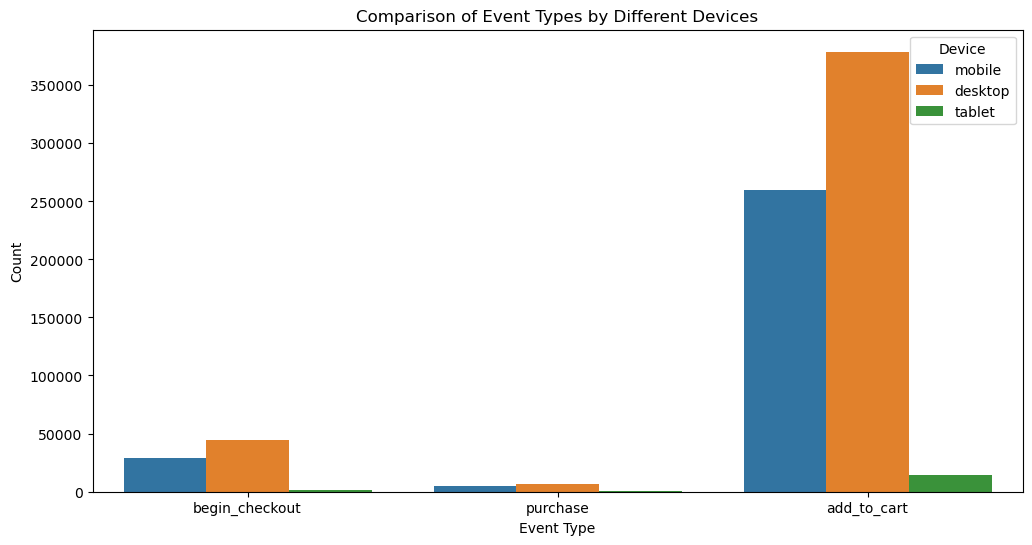

In [199]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='type', hue='device')
plt.title('Comparison of Event Types by Different Devices')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.legend(title='Device')
plt.show()

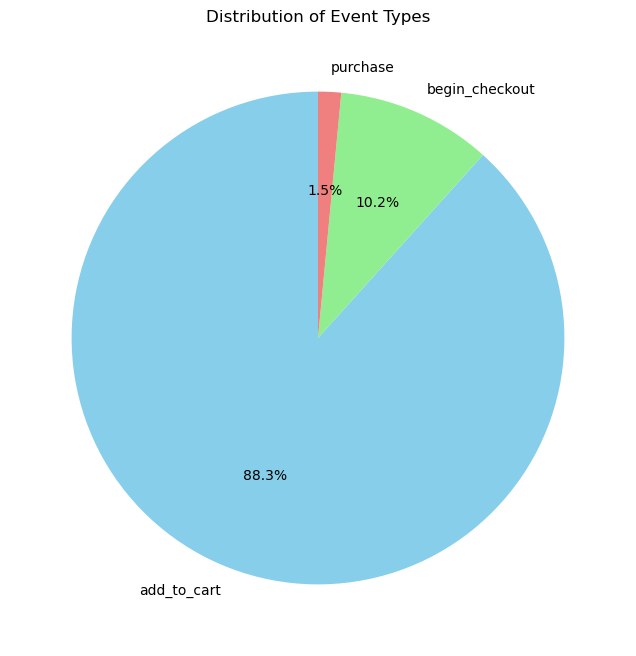

In [200]:
# Count the occurrences of each event type
event_type_counts = df['type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
event_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Event Types')
plt.ylabel('')  # Hide the y-label
plt.show()

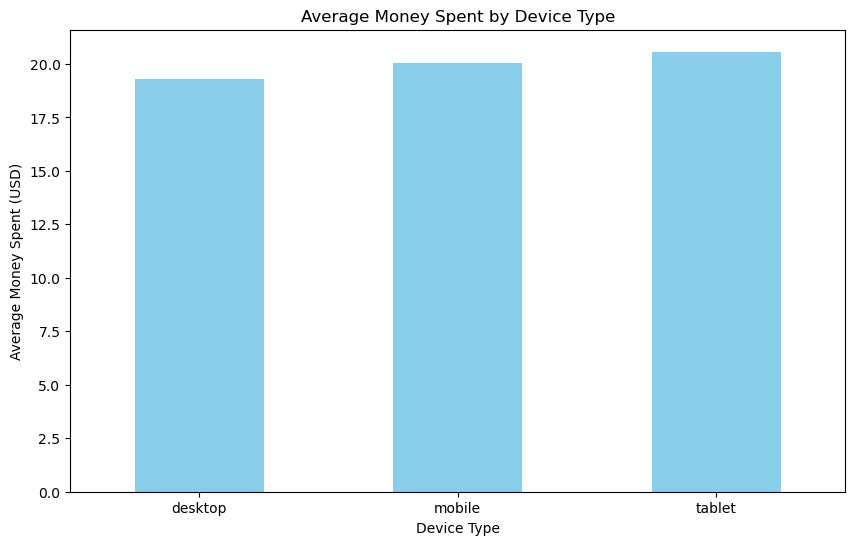

In [201]:
# Calculate the average money spent by device type (having the 'purchase' event)
average_spent_by_device = df[df['type'] == 'purchase'].groupby('device')['price_in_usd'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
average_spent_by_device.plot(kind='bar', color='skyblue')
plt.title('Average Money Spent by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Average Money Spent (USD)')
plt.xticks(rotation=0)
plt.show()

## Differences in user behavior between device types?

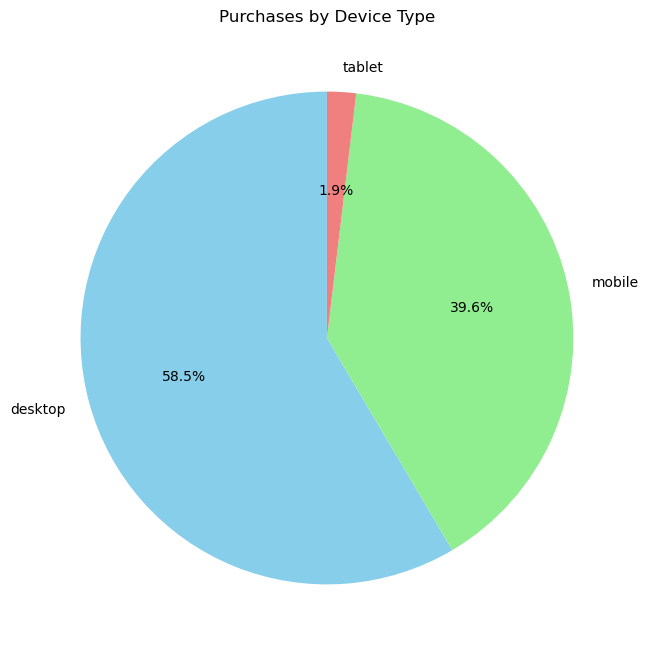

In [202]:
# Filter the dataframe to include only purchase events
purchase_df = df[df['type'] == 'purchase']

# Count the number of purchases by device type
purchase_counts_by_device = purchase_df['device'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
purchase_counts_by_device.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Purchases by Device Type')
plt.ylabel('')  # Hide the y-label
plt.show()

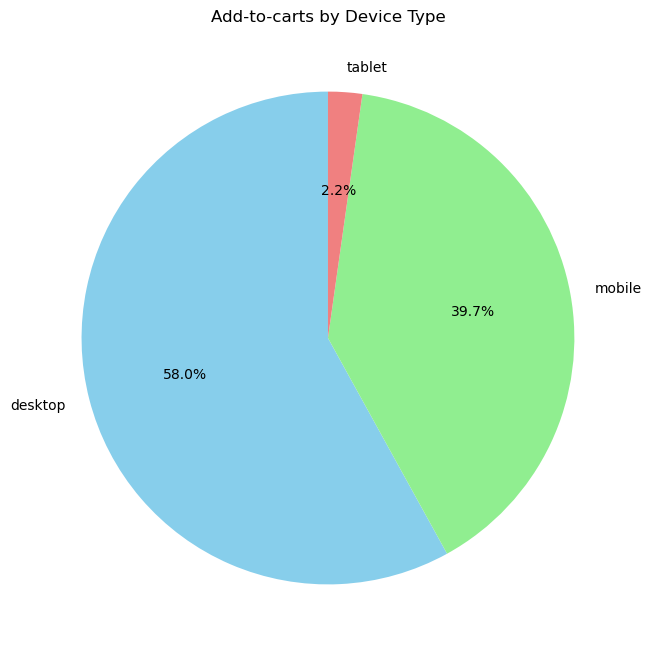

In [203]:
# Filter the dataframe to include only purchase events
add_to_cart_df = df[df['type'] == 'add_to_cart']

# Count the number of purchases by device type
add_to_cart_counts_by_device = add_to_cart_df['device'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
add_to_cart_counts_by_device.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Add-to-carts by Device Type')
plt.ylabel('')  # Hide the y-label
plt.show()

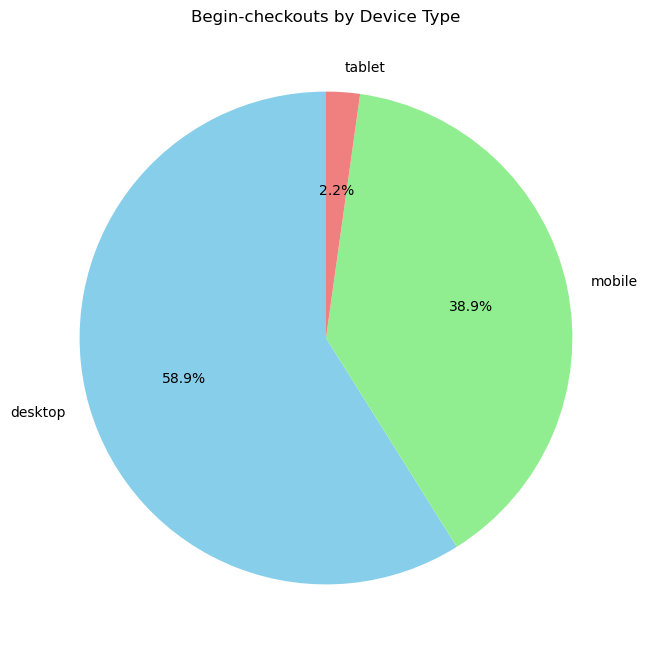

In [204]:
# Filter the dataframe to include only purchase events
begin_checkout_df = df[df['type'] == 'begin_checkout']

# Count the number of purchases by device type
begin_checkout_counts_by_device = begin_checkout_df['device'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
begin_checkout_counts_by_device.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Begin-checkouts by Device Type')
plt.ylabel('')  # Hide the y-label
plt.show()

In [205]:
# total money spent by all users (having purchase events)
purchase_df['price_in_usd'].sum()

218792

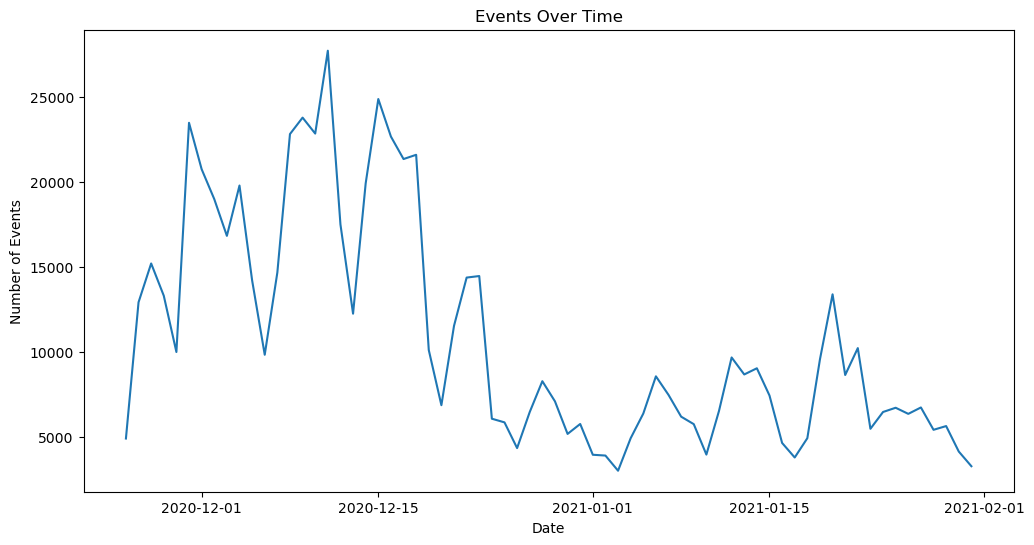

In [206]:
# events over time (line plot)
df['date_day'] = df['date'].dt.date
events_over_time = df['date_day'].value_counts().sort_index()
events_over_time.plot(kind='line', figsize=(12, 6))
plt.title('Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

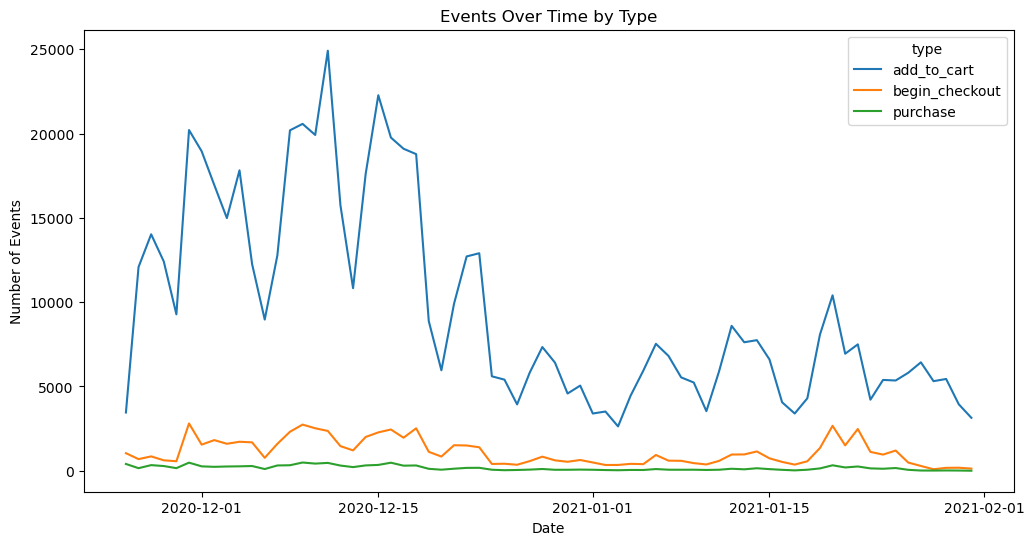

In [207]:
# events over time comparing different types of events
events_over_time_by_type = df.groupby(['date_day', 'type']).size().unstack().fillna(0)
events_over_time_by_type.plot(kind='line', figsize=(12, 6))
plt.title('Events Over Time by Type')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.show()

Data quality issues until December -> fixed.
Christmas season clearly visible.
Why these fluctuations in the events over time? Weekdays?

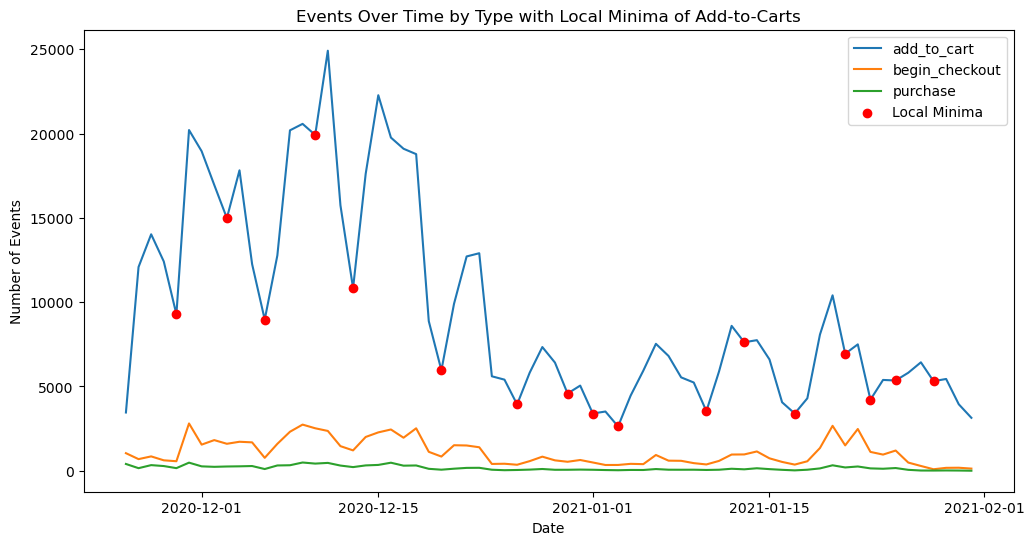

In [208]:
from scipy.signal import argrelextrema

# Find the local minima of add_to_cart events
local_minima_indices = argrelextrema(events_over_time_by_type['add_to_cart'].values, comparator=np.less)[0]
local_minima_dates = events_over_time_by_type.index[local_minima_indices]
local_minima_values = events_over_time_by_type['add_to_cart'].iloc[local_minima_indices]

# Plot the events over time by type
plt.figure(figsize=(12, 6))
events_over_time_by_type.plot(kind='line', ax=plt.gca())
plt.scatter(local_minima_dates, local_minima_values, color='red', label='Local Minima', zorder=5)
plt.title('Events Over Time by Type with Local Minima of Add-to-Carts')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.show()

In [209]:
local_minima_dates

Index([2020-11-29, 2020-12-03, 2020-12-06, 2020-12-10, 2020-12-13, 2020-12-20,
       2020-12-26, 2020-12-30, 2021-01-01, 2021-01-03, 2021-01-10, 2021-01-13,
       2021-01-17, 2021-01-21, 2021-01-23, 2021-01-25, 2021-01-28],
      dtype='object', name='date_day')

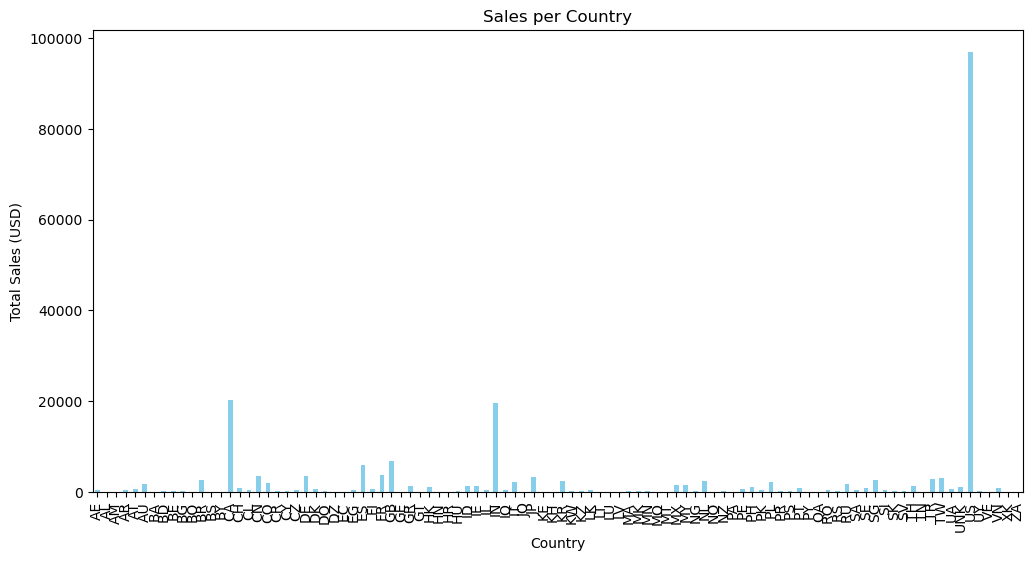

In [210]:
# Group by country and sum the sales
sales_per_country = df[df['type'] == 'purchase'].groupby('country')['price_in_usd'].sum()

# Plot the results
plt.figure(figsize=(12, 6))
sales_per_country.plot(kind='bar', color='skyblue')
plt.title('Sales per Country')
plt.xlabel('Country')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=90)
plt.show()

Local minimas appear to be mostly on Thursdays and Fridays.

In [211]:
# Find the user who spent the most money with purchases
user_spent_most = df[df['type'] == 'purchase'].groupby('user_id')['price_in_usd'].sum().idxmax()
user_spent_most_amount = df[df['type'] == 'purchase'].groupby('user_id')['price_in_usd'].sum().max()

user_spent_most, user_spent_most_amount

(7765, 1410)

In [213]:
# number of purchases of the user who spent the most money
df[(df['user_id'] == user_spent_most) & (df['type'] == 'purchase')].shape[0]

23

In [214]:
# average money spent per purchase
df[df['type'] == 'purchase']['price_in_usd'].mean()

19.60853199498118

In [215]:
# amount of users who made a purchase
df[df['type'] == 'purchase']['user_id'].nunique()

3093

In [220]:
# the user with the most events made
most_events_user = df['user_id'].value_counts().idxmax()
most_events_user_amount = df['user_id'].value_counts().max()

most_events_user, most_events_user_amount

(5644, 1428)

In [221]:
# number of purchases of the user with the most events
df[(df['user_id'] == most_events_user) & (df['type'] == 'purchase')].shape[0]

21

# Model

In the Model stage you build a more abstract representation of the data you studied, to find answers to the questions you selected to work on at the beginning. An abstract model does not necessarily have to be an AI model, but can also be a descriptive representation like a regression analysis or a clustering. After building a model, create one or more visualization(s) that describe the results of your model. 

Here are some possible modelling techniques to be used:

Clustering
Regression
Principal component analysis
Anomaly detection
AI modelling
Grading:

5 points - description of modeling process
5 points - visualization of the model results

In [231]:
# not sure how to do

# Report

The goal of the Report stage is to show your findings in an interactive dashboard. The dashboard should communicate the most important findings in the data to a broader audience. The findings you show in the dashboard may be related to the Model stage but are not limited to this, you can also show any other interesting features you discovered in the Wrangle & Profile stages (and which you think are interesting for other stakeholders).

	Task: Create an interactive dashboard that can be used to explain insights you found when analyzing the data. Please note that a dashboard is something that can be shown on one screen (e.g., a notebook is not a dashboard).

The requirements for the dashboard are (in relation to the topics of the lecture):
Use appropriate charts (as discussed in the lecture).
Use appropriate visual encodings (e.g., color) to visualize the information you would like to show.
Use at least four different types of visualizations / charts.
Include interaction (e.g., filters, zoom).
 

Grading:

20 points - implementation (usage of correct programming languages, usage of screen space, performance)
10 points - interaction (views are interactive)
10 points - brushing & linking (changes in one view affect others - global filters are not considered brushing & linking)